# Linear Filters, Convolution & Boundary Issues

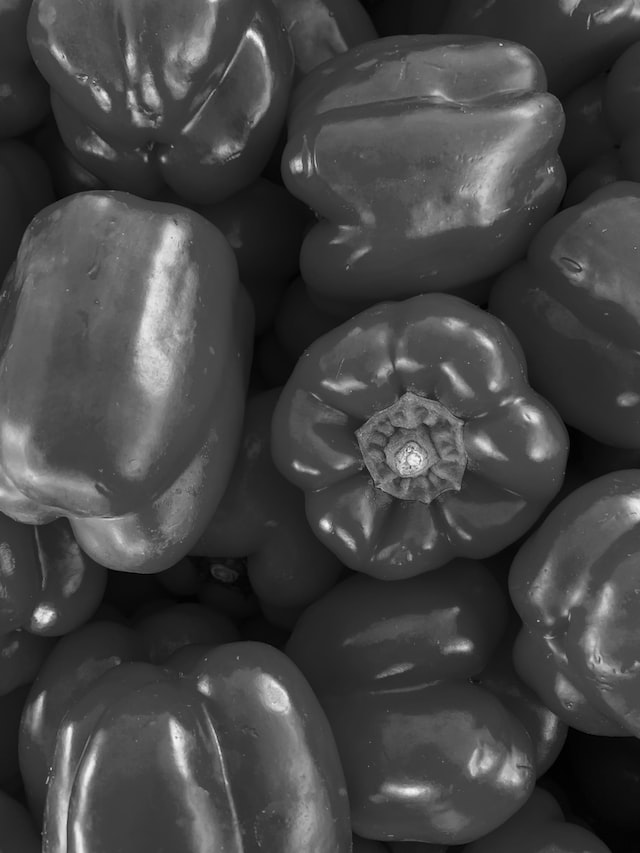

In [35]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

img = cv.imread('/content/drive/MyDrive/media/pepper.jpg', cv.IMREAD_GRAYSCALE)
cv2_imshow(img)

Convolution - applying a kernel\filter (in reverse) to an image (matrices).

Boundary Issues - arise when a kernel is applied to the edge of an image, where there are no values to use at to create the center value.

Therefore, there are many types of artifical boundaries that can be used inplace of the missing values.


1.   Clip Filter - trims the edges, kernel stays within image boundaries. 
2.   Wrap Arouond - using the sides from the other section of an image as if it has copies side by side.
3.   Copy Edge - continue the last pixel value in a line.
4.   Reflect Acorss Edges - copy the image's edge further.

```
cv2.GaussianBlur(<img>, np.ones(7,7)/49, borderType=2)
#matlab - imfilter(f, g, 0/'circular'/'replicate'/'symmetric')
```



```
cv::BorderTypes {
  cv::BORDER_CONSTANT = 0,
  cv::BORDER_REPLICATE = 1,
  cv::BORDER_REFLECT = 2,
  cv::BORDER_WRAP = 3,
  cv::BORDER_REFLECT_101 = 4,
  cv::BORDER_TRANSPARENT = 5,
  cv::BORDER_REFLECT101 = BORDER_REFLECT_101,
  cv::BORDER_DEFAULT = BORDER_REFLECT_101,
  cv::BORDER_ISOLATED = 16
}
```
[Source](https://docs.opencv.org/3.4/d2/de8/group__core__array.html)


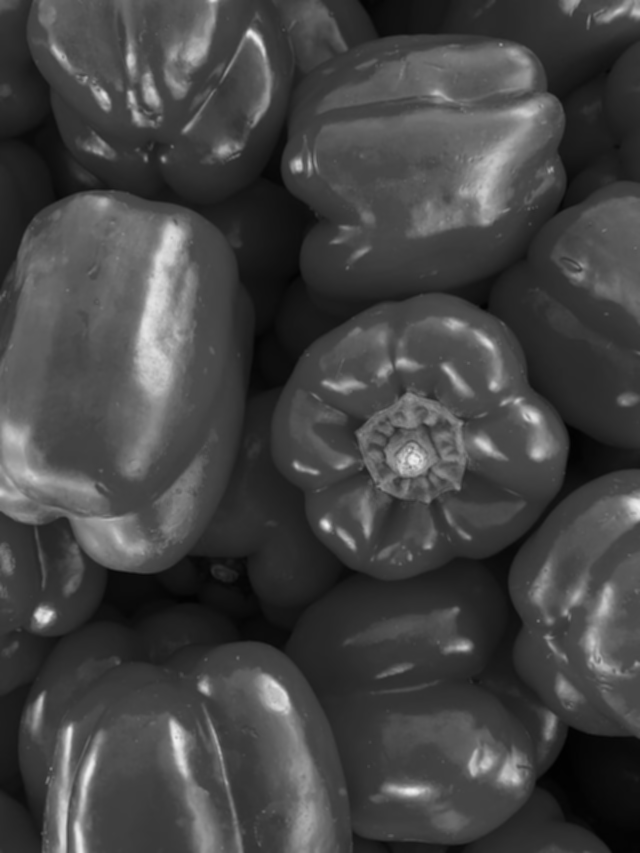

In [36]:
#filter
#mat = np.ones((3,3))/9
con = cv.GaussianBlur(img, (3,3), 3, borderType=2)
cv2_imshow(con)

When the impulse is just a center 1, we get get the same image in convolution, and the reversed image in correlation.
```
[0, 0, 0]
[0, 1, 0]
[0, 0, 0]
```

When it's below 1, we get a blurrier image

```
[0, 0, 0]
[0, 0.5, 0]
[0, 0, 0]
```

when it is above 1 we get a sharper image.

```
[0, 0, 0]
[0, 1.5, 0]
[0, 0, 0]
```

## Median Filterring 

Using the median values of surronding pixels to smooth over image noise.

In [ ]:
#creating salt and pepper noise
import random 

def add_noise(img): 
# Getting the dimensions of the image 
    row , col = img.shape 
# Randomly pick some pixels in the 
# image for coloring them white 
# Pick a random number between 300 and 10000   
    number_of_pixels = random.randint(300, 10000) 
    for i in range(number_of_pixels): 
        # Pick a random y coordinate 
        y_coord=random.randint(0, row - 1) 
        # Pick a random x coordinate 
        x_coord=random.randint(0, col - 1)
        # Color that pixel to white 
        img[y_coord][x_coord] = 255

    # Randomly pick some pixels in 
    # the image for coloring them black 
    # Pick a random number between 300 and 10000 
    number_of_pixels = random.randint(300 , 10000) 
    for i in range(number_of_pixels): 

        # Pick a random y coordinate 
        y_coord=random.randint(0, row - 1) 
        # Pick a random x coordinate 
        x_coord=random.randint(0, col - 1) 
        # Color that pixel to black 
        img[y_coord][x_coord] = 0
    return img 
# salt-and-pepper noise can 
# be applied only to grayscale images 

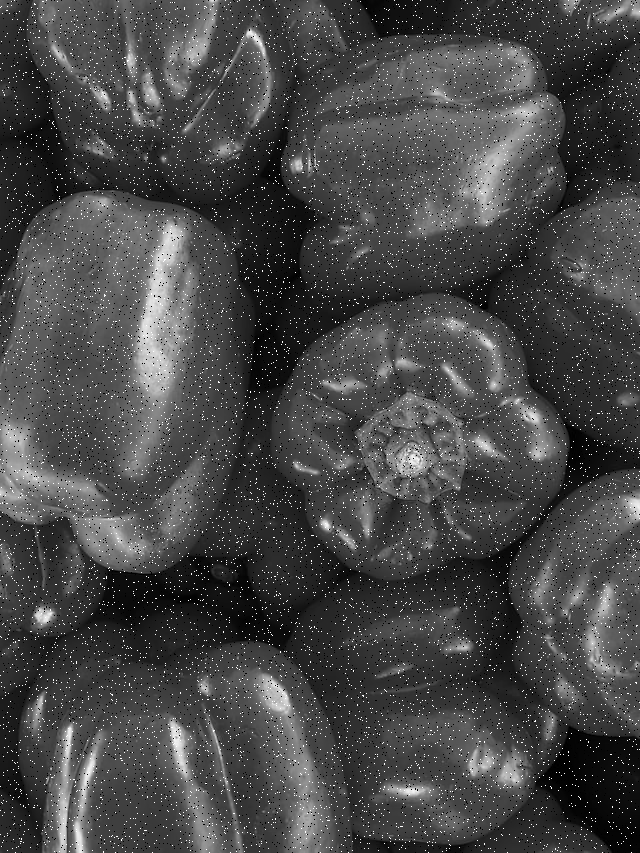

In [39]:
noisy_image = add_noise(img)
 
cv2_imshow(noisy_image)

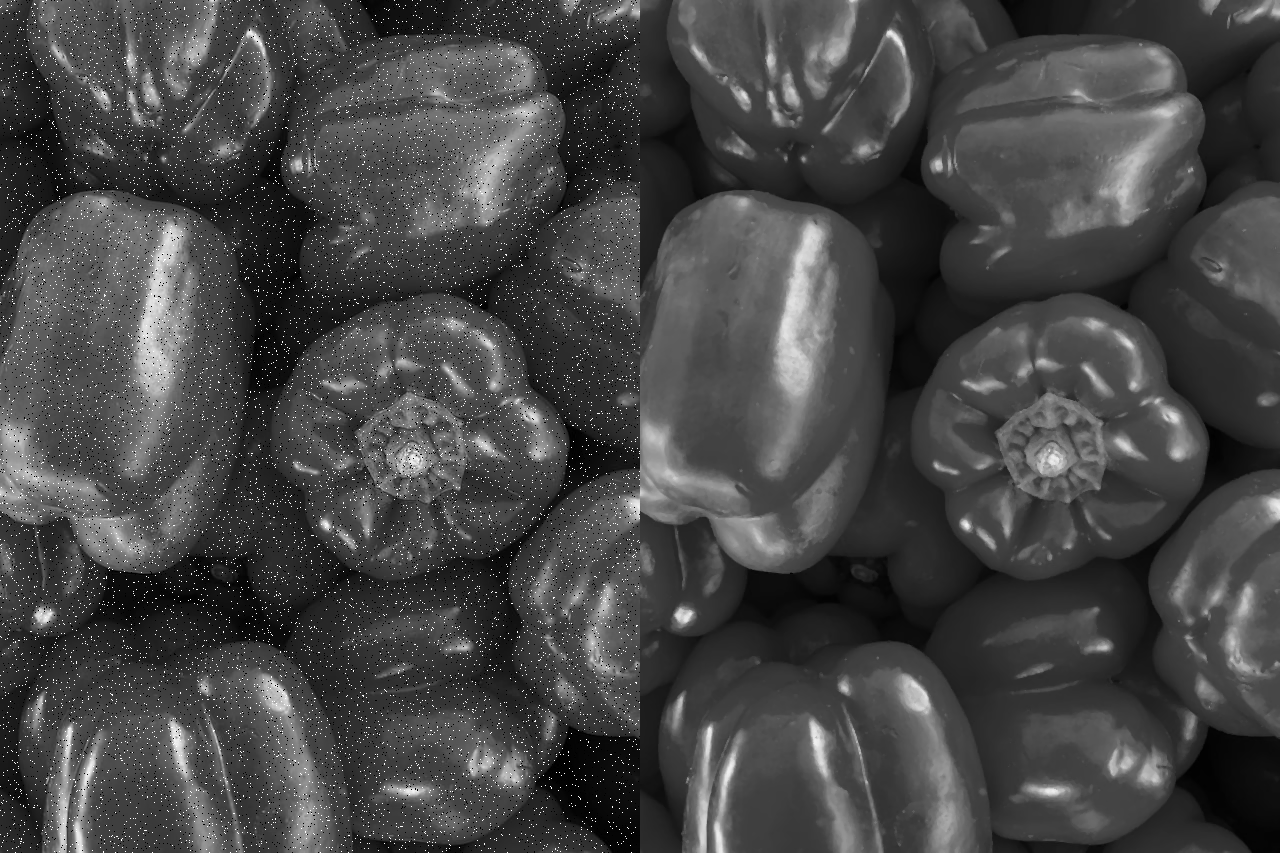

In [40]:
#unsharp masking
median = cv.medianBlur(noisy_image, 3)
comp = np.concatenate((noisy_image, median), axis = 1)
cv2_imshow(comp)